In [47]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [48]:
## using K-Means clustering algorithm form customer segmentation

In [49]:
# Collecting Data
customer_data = pd.read_csv('Mall_Customers.csv')

In [50]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
# choosing the Annual Income and Spending score for clustering
X = customer_data.iloc[:,[3,4]].values

In [ ]:
## Cluster indicates type of customer
# choosing the no. of clusters
# WCSS -within clusters sum of squares

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++' ,random_state = 42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

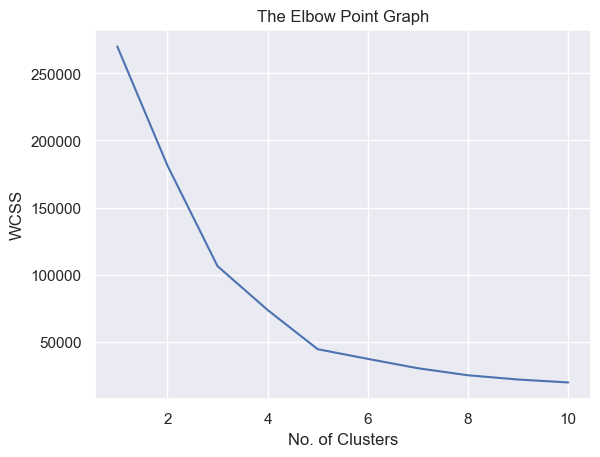

In [54]:
# Plot graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
# Optimun no. of cluster == 05 from graph
# using K-Means Clustering Model
# K == 05
# it indicates there are 5 types of customers for segmentation process

kmeans = KMeans(n_clusters = 5,init = 'k-means++', random_state = 0)

# labeling Clusters
Y = kmeans.fit_predict(X)
print(Y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


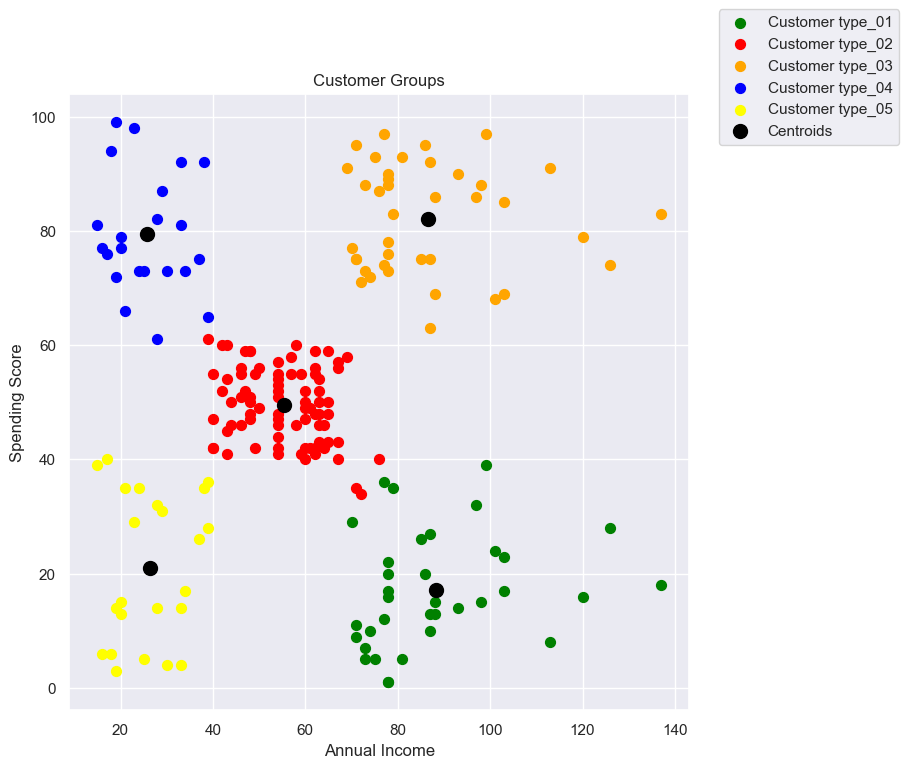

In [69]:
# visualizing all clusters

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Customer type_01')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Customer type_02')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='orange',label='Customer type_03')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='Customer type_04')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='yellow',label='Customer type_05')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor =(1.35, 1.15), ncol = 1)
plt.show()